In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (5, 4)

In [4]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,super built up area 1081(100.43 sq.m.)carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,built up area: 1000 (92.9 sq.m.)carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,super built up area 1995(185.34 sq.m.)built up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [6]:
df.shape

(3803, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [8]:
df.duplicated().sum()

126

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
# property type
df.property_type.value_counts()/len(df)

property_type
flat     0.766386
house    0.233614
Name: count, dtype: float64

<Axes: xlabel='property_type'>

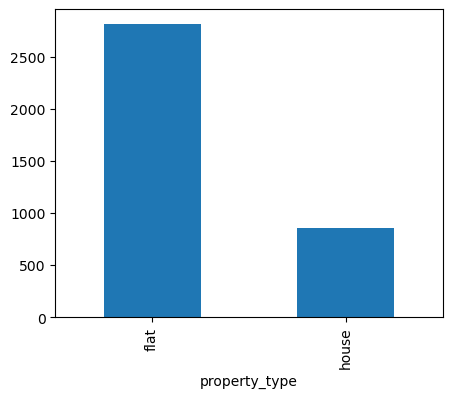

In [11]:
df.property_type.value_counts().plot(kind = 'bar')

In [12]:
# societies
df.society.value_counts()/len(df)

society
independent                               0.132173
tulip violet                              0.020397
ss the leaf                               0.019853
dlf new town heights                      0.011422
shapoorji pallonji joyville gurugram      0.011422
                                            ...   
dlf gardencity enclave                    0.000272
nitin vihar                               0.000272
landmark the residency                    0.000272
kw royal court                            0.000272
surendra homes dayaindependentd colony    0.000272
Name: count, Length: 676, dtype: float64

In [13]:
df[df['society']!= 'independent']['society'].value_counts(normalize = True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [14]:
df.society.value_counts().shape[0] - 1

675

out of 675 societies , 50 percent of total data data comes from only 75 societies 

In [15]:
s_counts = df.society.value_counts()

In [16]:
frequency_bins = {
    'very high(>100)':(s_counts>100).sum(),
    'high(50-100)': ((s_counts>=50) & (s_counts<=100)).sum(),
    'average(10-49)':((s_counts>=10) & (s_counts<=49)).sum(),
    'low(2-9)':((s_counts>=2 ) & (s_counts<=9)).sum(),
    'very low(1)':(s_counts==1).sum()
}

In [17]:
frequency_bins

{'very high(>100)': 1,
 'high(50-100)': 2,
 'average(10-49)': 92,
 'low(2-9)': 273,
 'very low(1)': 308}

<Axes: xlabel='society'>

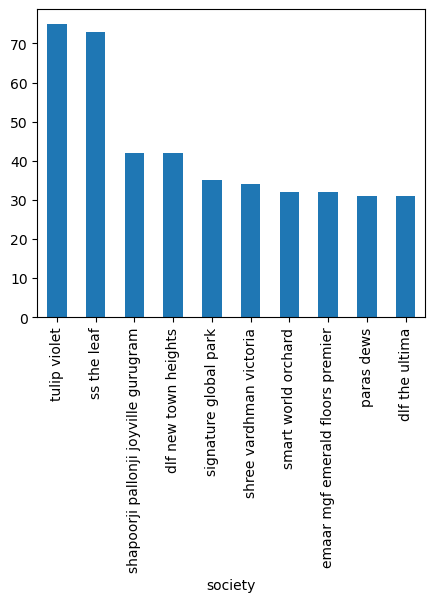

In [18]:
df[df['society']!= 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [19]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,built up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [20]:
df['price']

0        0.82
1        0.95
2        0.46
3        0.32
4        1.60
        ...  
3798     0.37
3799     6.00
3800     0.60
3801    15.50
3802     1.78
Name: price, Length: 3677, dtype: float64

In [21]:
df.price.describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

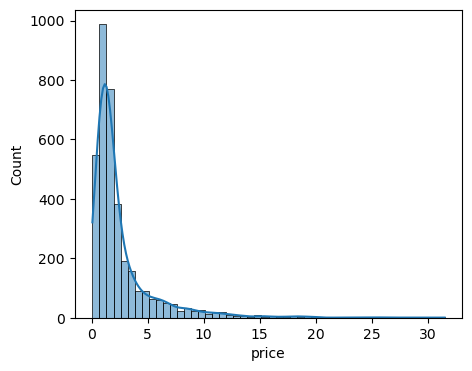

In [22]:
sns.histplot(x = 'price', kde = True , bins = 50,data = df)

<Axes: xlabel='price'>

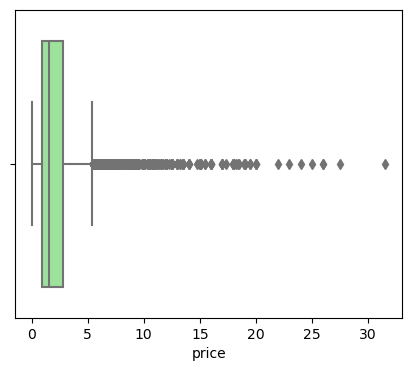

In [23]:
sns.boxplot(x = df.price,color = 'lightgreen')

In [24]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1
print(IQR)

1.8


In [25]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [26]:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [27]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [29]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [30]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [31]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"] 
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)

0         0-1
1         0-1
2         0-1
3         0-1
4         1-2
        ...  
3798      0-1
3799     5-10
3800      0-1
3801    10-20
3802      1-2
Name: price, Length: 3677, dtype: category
Categories (7, object): ['0-1' < '1-2' < '2-3' < '3-5' < '5-10' < '10-20' < '20-50']

In [32]:
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts()

price
1-2      1315
0-1      1002
2-3       504
3-5       368
5-10      342
10-20     118
20-50      11
Name: count, dtype: int64

<Axes: xlabel='price'>

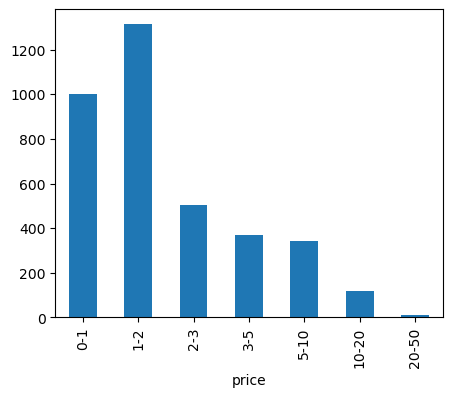

In [33]:
pd.cut(df['price'], bins=bins,labels=bin_labels,  right=False).value_counts().sort_index().plot(kind = 'bar')

In [34]:
df['price'].value_counts(normalize = True).sort_index().cumsum()


price
0.07     0.000273
0.16     0.000546
0.17     0.000820
0.19     0.001093
0.20     0.003279
           ...   
24.00    0.998634
25.00    0.998907
26.00    0.999454
27.50    0.999727
31.50    1.000000
Name: proportion, Length: 473, dtype: float64

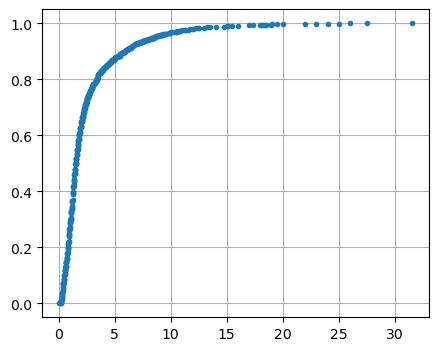

In [35]:
ecdf = df['price'].value_counts(normalize = True).sort_index().cumsum()
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


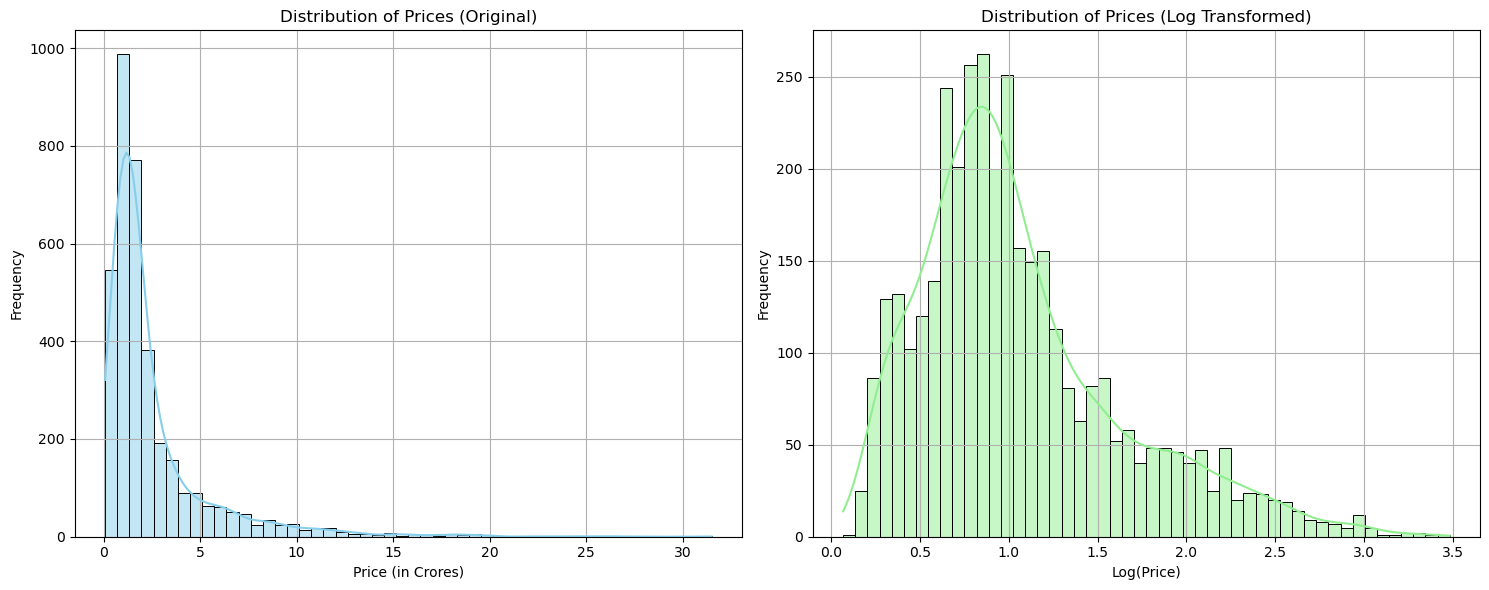

In [36]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')
plt.grid()

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.grid()
plt.show()

In [37]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


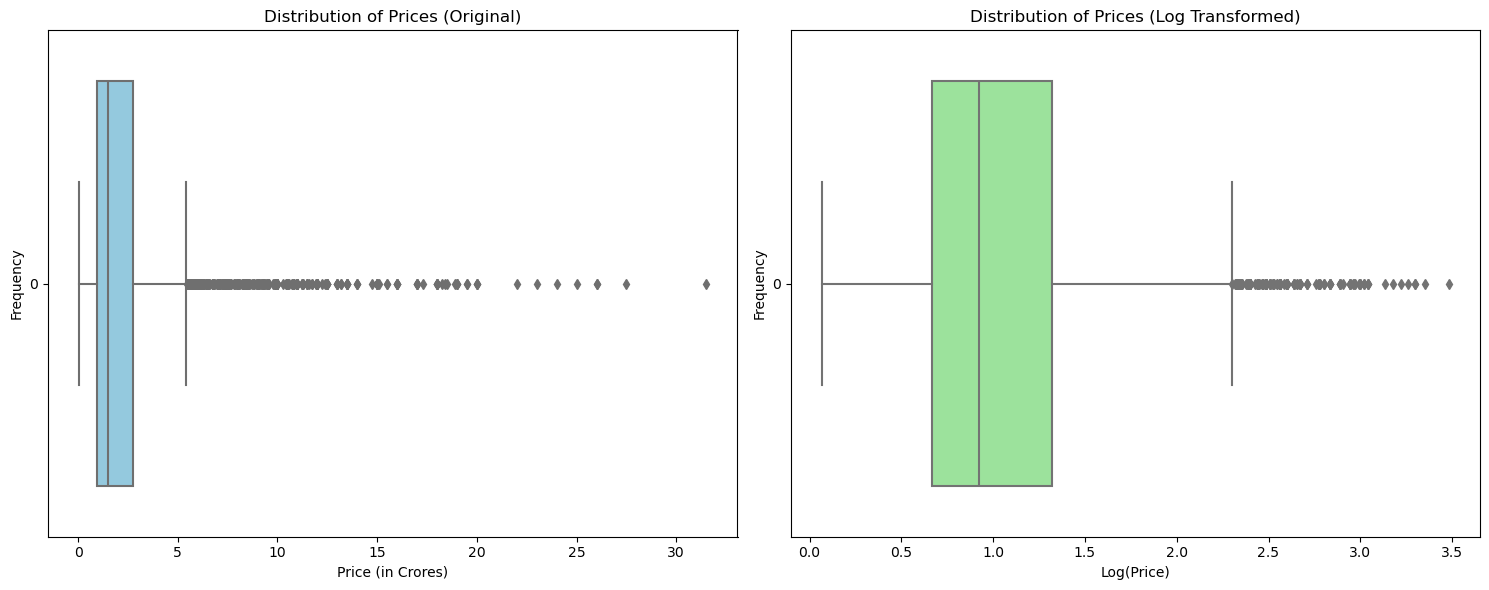

In [38]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue',orient = 'h')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen', orient = 'h')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [39]:
df['price_per_sqft'].isnull().sum()

17

In [40]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


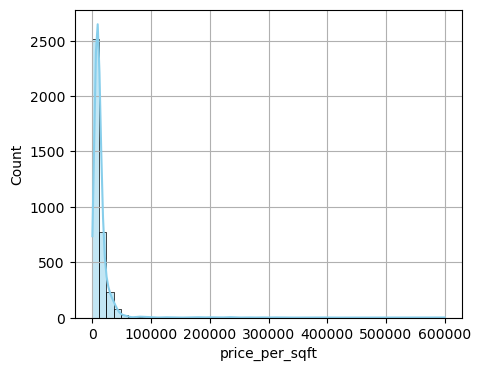

In [41]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)
plt.grid()

<Axes: >

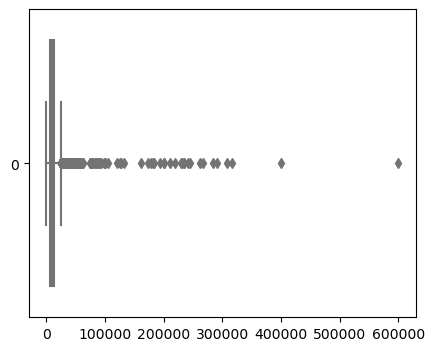

In [42]:
sns.boxplot(df['price_per_sqft'], color='lightgreen',orient = 'h')

In [43]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

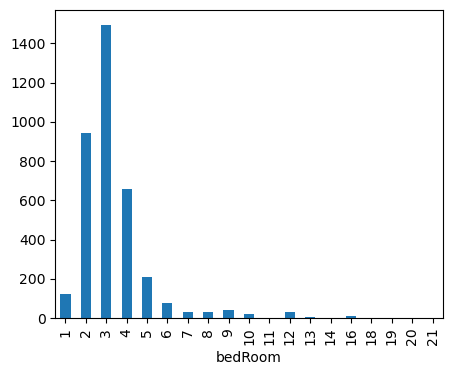

In [44]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

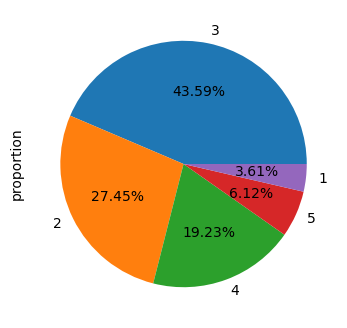

In [45]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [46]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

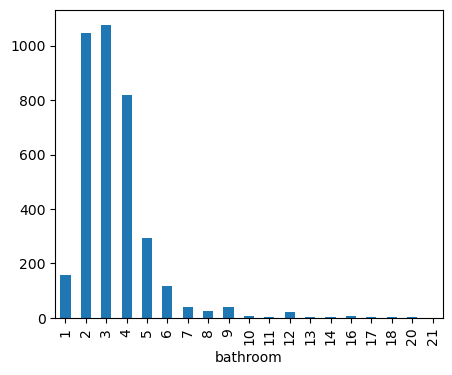

In [47]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

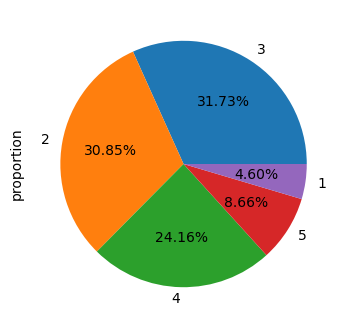

In [48]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [49]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

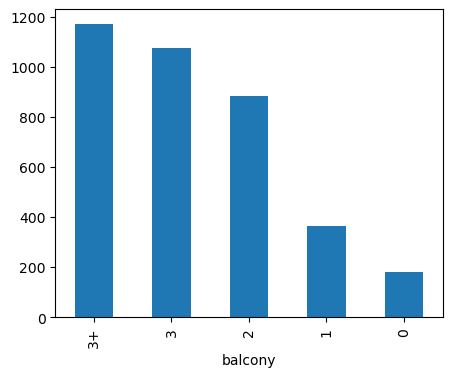

In [50]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

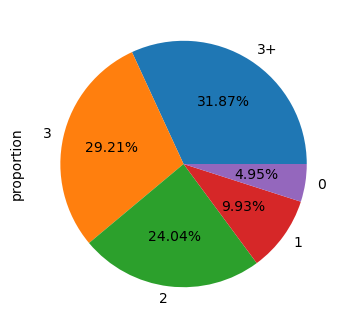

In [51]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [52]:
df['floorNum'].isnull().sum()

19

In [57]:
df['floorNum'].describe(percentiles = [0.25 , 0.75 ,  0.9 ,  0.99])

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
90%        15.000000
99%        27.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

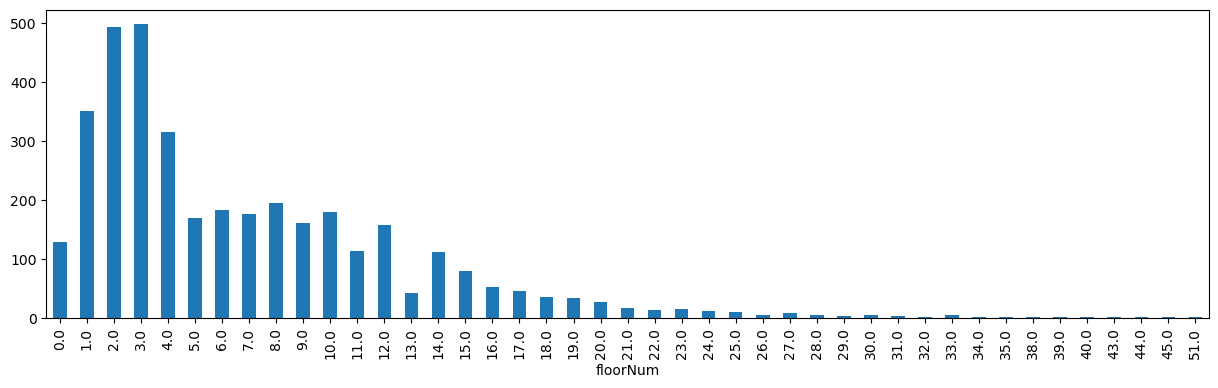

In [59]:
plt.figure(figsize= (15 , 4))
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

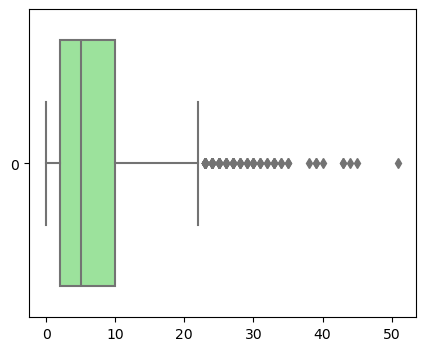

In [61]:
sns.boxplot(df['floorNum'], color='lightgreen',orient = 'h')

In [62]:
df['facing'].isnull().sum()

1045

In [64]:
df['facing'].fillna('NA',inplace=True)

In [65]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

In [66]:
df['agePossession'].isnull().sum()

0

In [67]:
df['agePossession'].value_counts()

agePossession
relatively new        1646
new property           593
moderately old         563
undefined              306
old property           303
under construction     266
Name: count, dtype: int64

<Axes: xlabel='agePossession'>

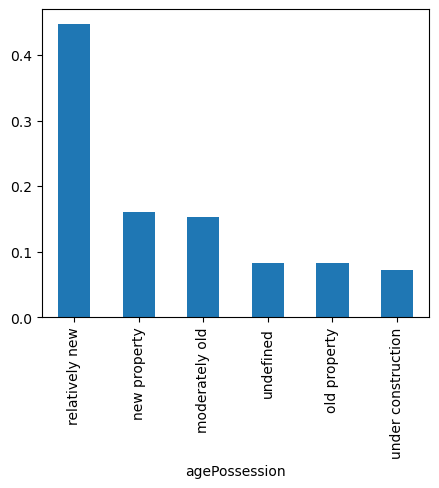

In [69]:
df['agePossession'].value_counts(normalize = True).plot(kind = 'bar')

In [70]:
df['super_built_up_area'].isnull().sum()

1802

In [71]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [73]:
df[df.super_built_up_area==89]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
881,flat,godrej aria,sector 79,1.1,11482.0,958.0,super built up area 89,2,2,3,...,89.0,NaN,NaN,0,0,0,0,0,0,62


In [74]:
958.0/89

10.764044943820224

In [76]:
df[df['super_built_up_area']<1000.00000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
347,flat,sushant lok 1 builder floors,sector 43,2.50,12920.0,1935.0,super built up area 215(179.77 sq.m.),3,3,2,...,215.0,NaN,NaN,0,0,0,0,0,0,0
613,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,super built up area 145carpet area: 86 sq.m.,3,2,3+,...,145.0,NaN,86.00,0,0,0,0,0,0,70
718,flat,rof ananda,sector 95,0.26,6032.0,431.0,super built up area 431(40.04 sq.m.)carpet are...,1,1,1,...,431.0,NaN,380.44,0,0,0,0,0,0,49
881,flat,godrej aria,sector 79,1.10,11482.0,958.0,super built up area 89,2,2,3,...,89.0,NaN,NaN,0,0,0,0,0,0,62
983,flat,avl 36 gurgaon,sector 36a,0.36,8990.0,400.0,super built up area 406(37.72 sq.m.)carpet are...,1,1,1,...,406.0,NaN,402.00,0,0,0,0,0,0,95
1060,flat,godrej oasis,sector 88a,1.45,8367.0,1733.0,super built up area 161carpet area: 108.4 sq.m.,2,2,3+,...,161.0,NaN,108.40,1,0,0,0,0,2,85
1377,flat,avl 36 gurgaon,sector 36a,0.37,10539.0,351.0,super built up area 352(32.7 sq.m.),1,1,1,...,352.0,NaN,NaN,0,0,0,0,0,1,88
1632,flat,pivotal devaan,sector 84,0.27,7964.0,339.0,super built up area 439(40.78 sq.m.)carpet are...,1,1,1,...,439.0,NaN,339.00,0,0,0,0,0,2,45
1860,flat,unitech greenwood city,sector 45,2.40,12346.0,1944.0,super built up area 216(180.6 sq.m.),3,3,2,...,216.0,NaN,NaN,0,1,0,0,0,1,19
2247,flat,signature andour heights,sector 71,0.39,9846.0,396.0,super built up area 325(30.19 sq.m.),1,1,2,...,325.0,NaN,NaN,0,0,0,0,0,0,0


In [83]:
df.at[881, 'super_built_up_area'] = 958.0

In [84]:
df.loc[881]

property_type                            flat
society                           godrej aria
sector                              sector 79
price                                     1.1
price_per_sqft                        11482.0
area                                    958.0
areaWithType           super built up area 89
bedRoom                                     2
bathroom                                    2
balcony                                     3
floorNum                                  9.0
facing                                     NA
agePossession                    new property
super_built_up_area                     958.0
built_up_area                             NaN
carpet_area                               NaN
study room                                  0
servant room                                0
store room                                  0
pooja room                                  0
others                                      0
furnishing_type                   

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Count'>

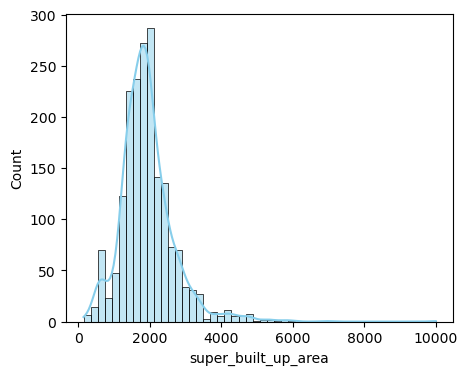

In [85]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

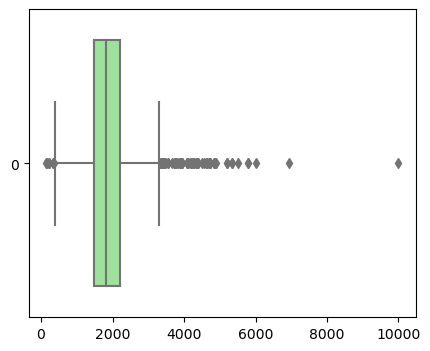

In [87]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen',orient = 'h')

In [88]:
df['built_up_area'].isnull().sum()

1987

In [89]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585811
std       17942.880238
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

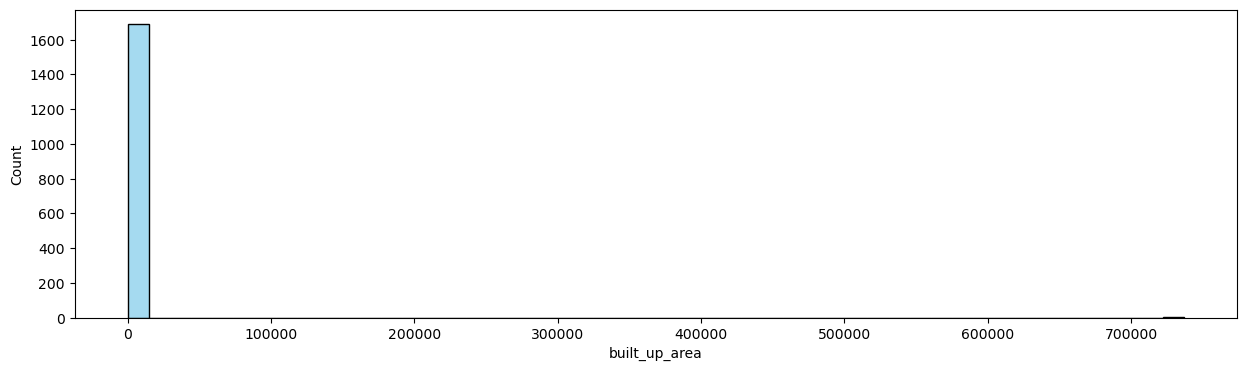

In [92]:
plt.figure(figsize = (15 , 4))
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='Frequency'>

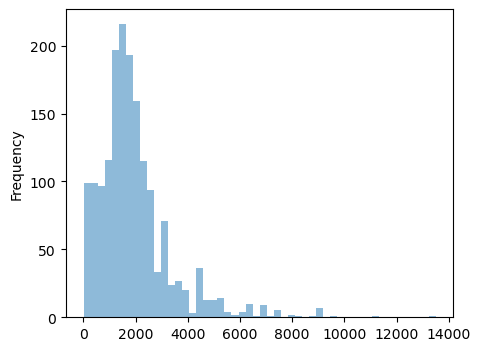

In [102]:
df[df['built_up_area']<700000]['built_up_area'].plot(kind = 'hist',bins = 50, alpha=0.5)

In [105]:
1471,1648

13497.901044096014

In [103]:
df[df.built_up_area>8000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
114,house,independent,sector 25,10.00,37037.0,2700.0,plot area 2700(250.84 sq.m.)built up area: 950...,5,5,3+,...,NaN,9500.0,9000.0,0,1,0,1,0,2,29
323,house,anamika enclave,sector 12,6.00,14492.0,4140.0,plot area 4140(384.62 sq.m.)built up area: 900...,9,9,3+,...,NaN,9000.0,NaN,0,0,0,0,0,0,9
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74
966,house,vipul tatvam villa,sector 48,19.50,22222.0,8775.0,plot area 975(815.22 sq.m.),5,6,3,...,NaN,8775.0,NaN,1,1,1,1,0,1,110
1266,house,emaar mgf marbella,sector 66,15.10,18605.0,8116.0,plot area 754,5,5,3+,...,NaN,8067.8,NaN,1,1,1,1,0,0,120
1325,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,plot area 3762(349.5 sq.m.)built up area: 9000...,7,8,3+,...,NaN,9000.0,6500.0,0,1,1,1,0,1,31
1471,house,independent,sector 4,0.85,630.0,13492.0,plot area 1500(1254.19 sq.m.),3,3,1,...,NaN,13500.0,NaN,0,0,0,0,1,0,0
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,built up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,2,44
1938,house,independent house sector 45,sector 40,9.00,38022.0,2367.0,plot area 2367(219.9 sq.m.)built up area: 9000...,12,12,3,...,NaN,9000.0,6000.0,0,1,0,0,0,1,71
1971,house,dlf alameda,sector 73,17.00,35109.0,4842.0,plot area 4842(449.84 sq.m.)built up area: 900...,5,8,3,...,NaN,9000.0,NaN,1,1,1,1,0,2,87


In [106]:
df = df.drop([1471, 1648])

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

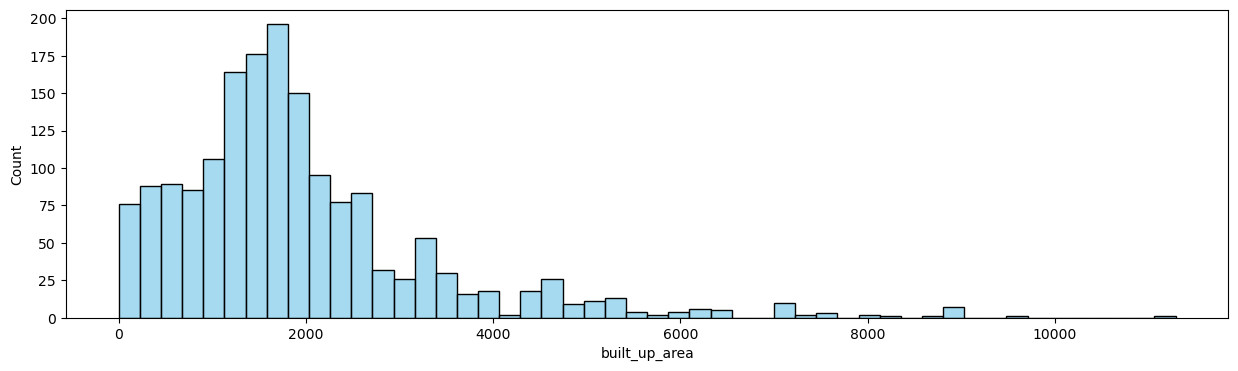

In [107]:
plt.figure(figsize = (15 , 4))
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

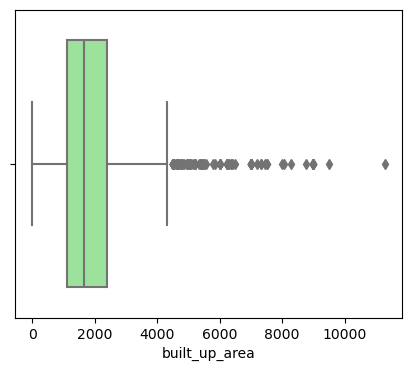

In [111]:
sns.boxplot(x = 'built_up_area' , data = df , color = 'lightgreen')

In [113]:
df[df.built_up_area>6000].sort_values(by='built_up_area',ascending = False
                                     )

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.50,24366.0,11286.0,plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
114,house,independent,sector 25,10.00,37037.0,2700.0,plot area 2700(250.84 sq.m.)built up area: 950...,5,5,3+,...,NaN,9500.0,9000.0,0,1,0,1,0,2,29
1938,house,independent house sector 45,sector 40,9.00,38022.0,2367.0,plot area 2367(219.9 sq.m.)built up area: 9000...,12,12,3,...,NaN,9000.0,6000.0,0,1,0,0,0,1,71
1325,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,plot area 3762(349.5 sq.m.)built up area: 9000...,7,8,3+,...,NaN,9000.0,6500.0,0,1,1,1,0,1,31
3647,house,independent,sohna road road,6.25,6944.0,9001.0,plot area 1000(836.13 sq.m.),3,3,0,...,NaN,9000.0,NaN,0,0,0,0,0,0,0
323,house,anamika enclave,sector 12,6.00,14492.0,4140.0,plot area 4140(384.62 sq.m.)built up area: 900...,9,9,3+,...,NaN,9000.0,NaN,0,0,0,0,0,0,9
2765,house,independent,sector 26,23.00,25556.0,9000.0,plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,1,145
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74
1971,house,dlf alameda,sector 73,17.00,35109.0,4842.0,plot area 4842(449.84 sq.m.)built up area: 900...,5,8,3,...,NaN,9000.0,NaN,1,1,1,1,0,2,87
966,house,vipul tatvam villa,sector 48,19.50,22222.0,8775.0,plot area 975(815.22 sq.m.),5,6,3,...,NaN,8775.0,NaN,1,1,1,1,0,1,110


In [114]:
df['carpet_area'].isnull().sum()

1803

In [115]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179578
std       22799.836442
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

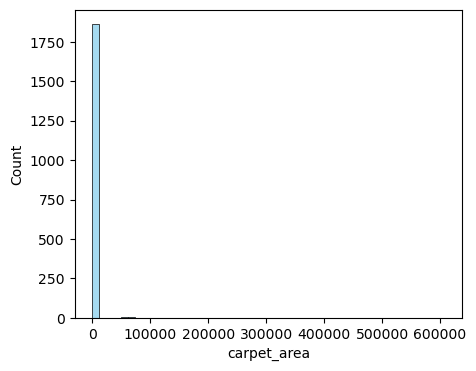

In [116]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

In [124]:
df = df[~(df.carpet_area>500000)]

In [130]:
df.carpet_area.describe(percentiles = [0.25 , 0.75 , 0.95])

count     1869.000000
mean      1628.169700
std       3384.669272
min         15.000000
25%        837.000000
50%       1300.000000
75%       1784.000000
95%       2900.000000
max      64529.000000
Name: carpet_area, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

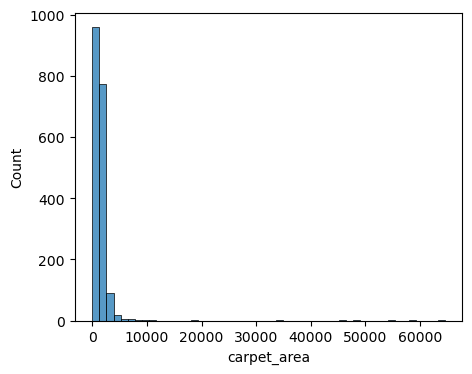

In [128]:
sns.histplot(x = 'carpet_area' , data = df,bins = 50)

In [138]:
df = df[~((df.carpet_area>2500) & (df.price<1)) ]

In [139]:
df.carpet_area.describe(percentiles = [0.25 , 0.75 , 0.95])

count     1860.000000
mean      1433.036651
std       1069.428875
min         15.000000
25%        833.720000
50%       1296.000000
75%       1760.500000
95%       2850.500000
max      18122.000000
Name: carpet_area, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

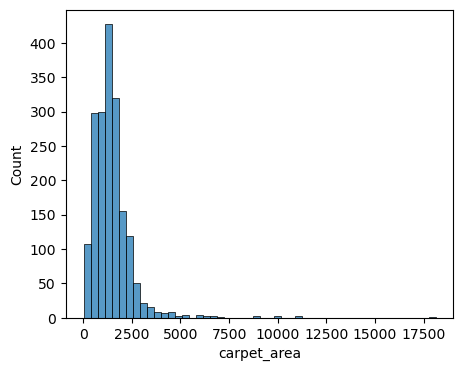

In [140]:
sns.histplot(x = 'carpet_area' , data = df,bins = 50)

In [141]:
df[df.carpet_area>4000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
114,house,independent,sector 25,10.00,37037.0,2700.0,plot area 2700(250.84 sq.m.)built up area: 950...,5,5,3+,...,NaN,9500.0,9000.0,0,1,0,1,0,2,29
130,flat,adani m2k oyster grande,sector 102,4.55,10000.0,4550.0,super built up area 4650(432 sq.m.)built up ar...,4,4,3+,...,4650.0,4630.0,4550.0,0,0,0,0,0,1,60
195,flat,residency grand,sector 52,5.00,7692.0,6500.0,carpet area: 5200 (483.1 sq.m.),5,7,3+,...,NaN,NaN,5200.0,0,1,0,1,0,0,77
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.0,0,0,0,0,0,0,0
426,house,independent,sector 26,18.25,18250.0,10000.0,plot area 550(51.1 sq.m.)carpet area: 10000 sq...,7,9,3+,...,NaN,NaN,10000.0,1,1,1,1,0,1,77
442,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,carpet area: 10000 (929.03 sq.m.),4,4,3,...,NaN,NaN,10000.0,0,1,0,0,0,0,35
499,flat,beverley park 1,sector 43,8.44,16230.0,5200.0,super built up area 5200(483.1 sq.m.)built up ...,4,5,3,...,5200.0,5000.0,4900.0,0,1,0,0,0,2,117
550,house,emaar mgf marbella,sector 66,19.00,31666.0,6000.0,plot area 9000(836.13 sq.m.)carpet area: 6000 ...,5,6,3+,...,NaN,NaN,6000.0,0,1,1,1,0,1,110
695,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,carpet area: 4800 (445.93 sq.m.),6,7,3+,...,NaN,NaN,4800.0,1,1,0,0,0,0,119
769,flat,palam vihar society,sector 2,3.35,7444.0,4500.0,carpet area: 4500 (418.06 sq.m.),4,4,3+,...,NaN,NaN,4500.0,1,0,0,0,0,0,66


<Axes: xlabel='carpet_area'>

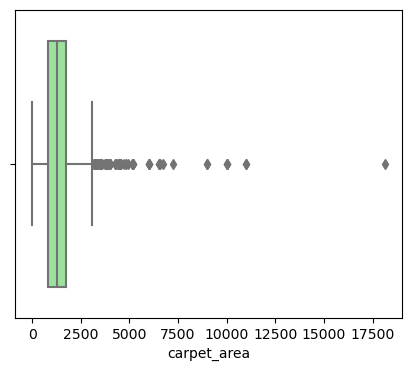

In [142]:
sns.boxplot(x = 'carpet_area' , data = df , color = 'lightgreen')

In [143]:
df[df.carpet_area>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.4,1859.0,98978.0,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.0,0,1,1,1,0,1,60
2131,flat,godrej air,sector 85,2.5,1379.0,18129.0,carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [155]:
df[(df.price == df[df.sector == 'sector 85']['price'].max()) & (df.sector == 'sector 85')]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2770,flat,ss the leaf,sector 85,2.7,7754.0,3482.0,super built up area 3482(323.49 sq.m.),4,4,3+,...,3482.0,NaN,NaN,0,0,0,0,0,0,21


In [157]:
df = df.drop([2131])

In [158]:
df.carpet_area.describe()

count     1859.000000
mean      1424.059263
std        997.150488
min         15.000000
25%        832.480000
50%       1295.000000
75%       1760.000000
max      11000.000000
Name: carpet_area, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

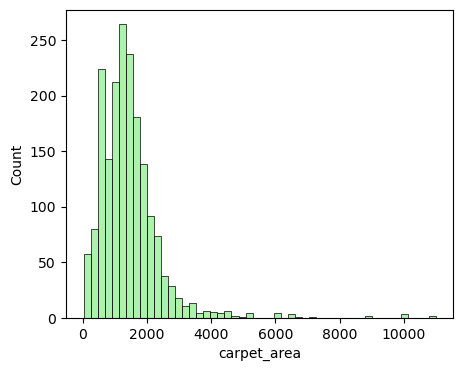

In [159]:
sns.histplot(x = 'carpet_area' , data = df , bins = 50 , color ='lightgreen')

<Axes: xlabel='carpet_area'>

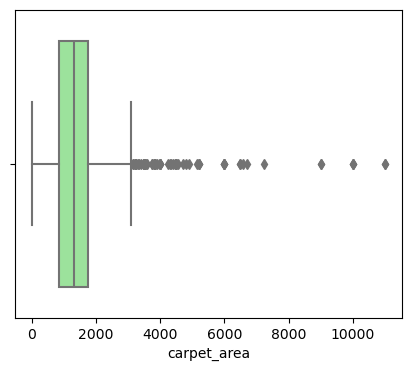

In [160]:
sns.boxplot(x = 'carpet_area' , data = df , color = 'lightgreen')

In [173]:
colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

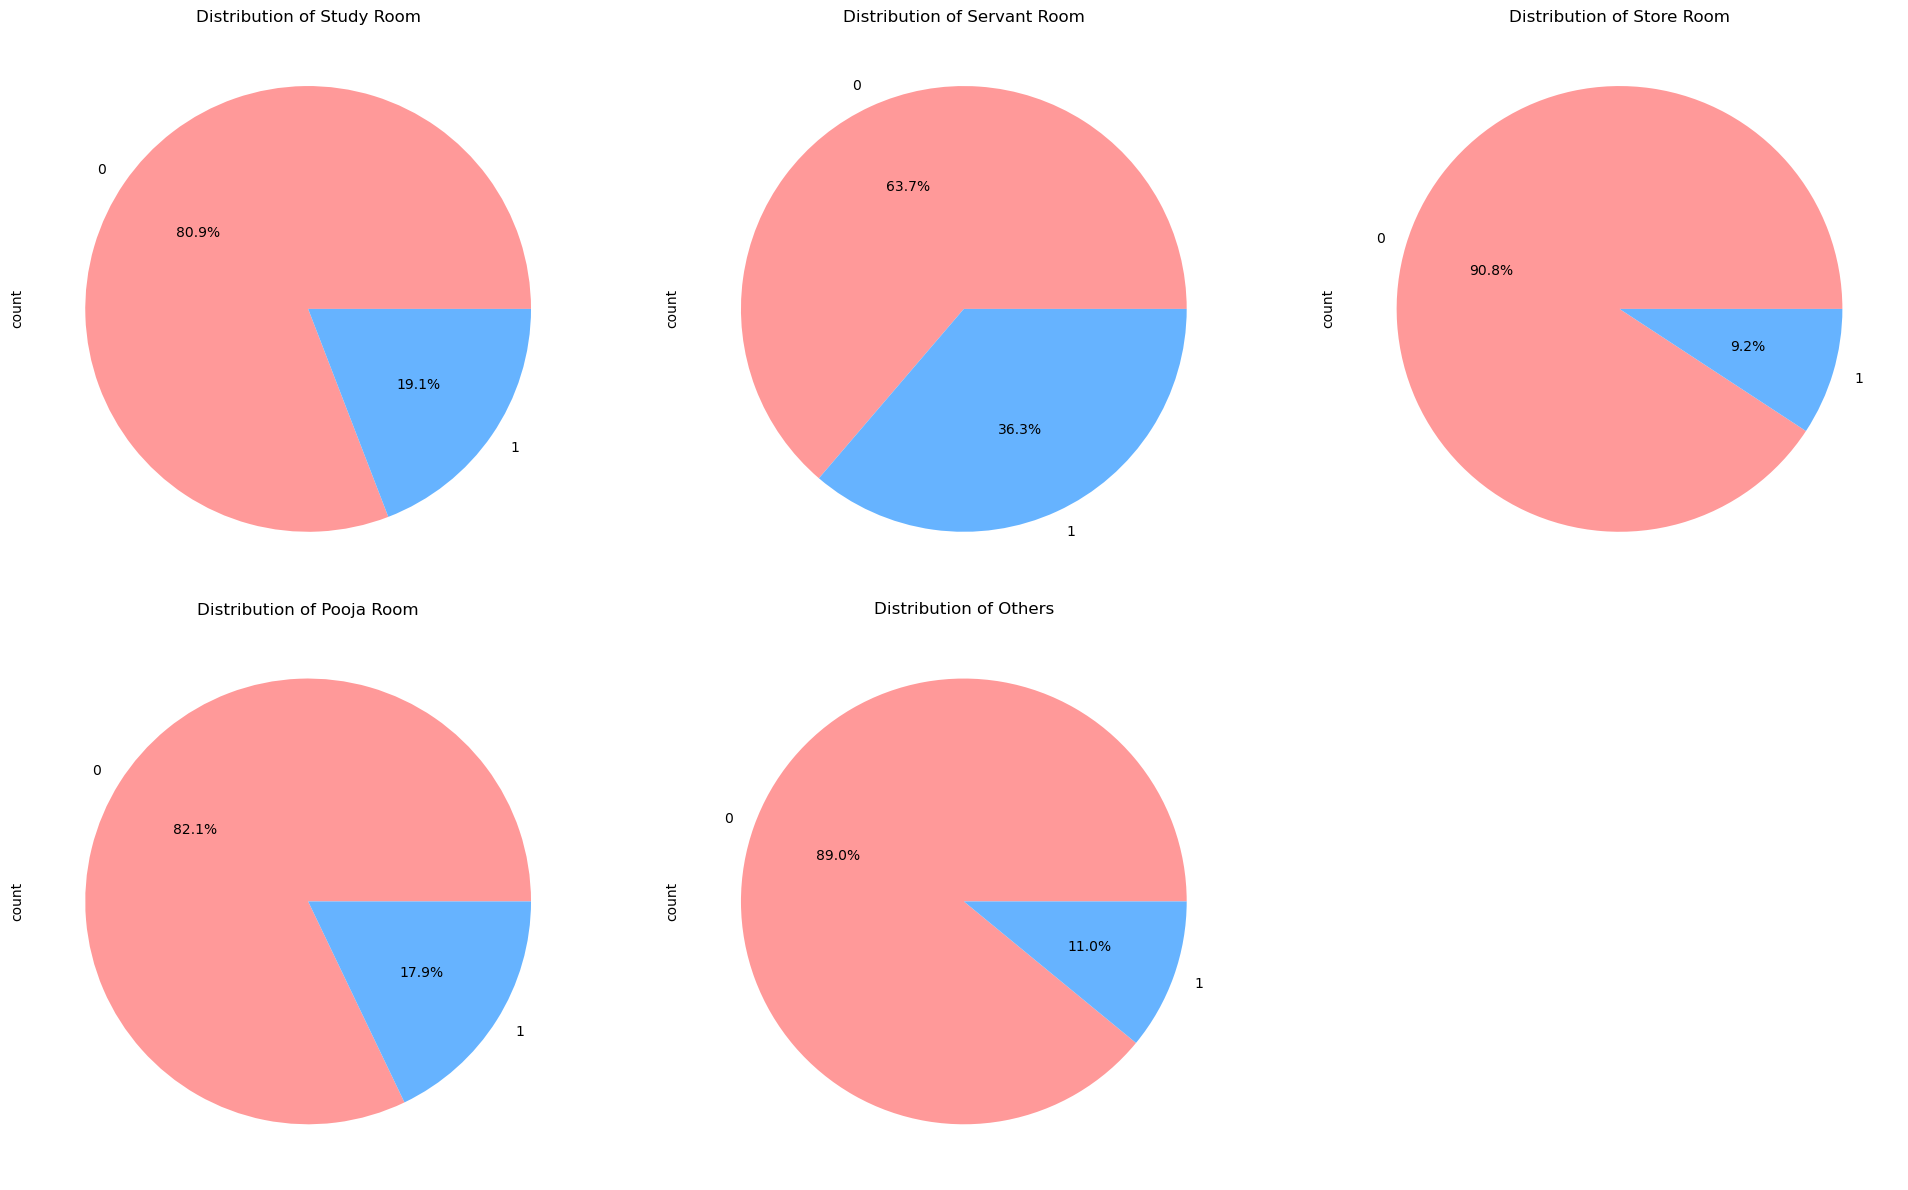

In [171]:
plt.figure(figsize=(20, 12))

for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2 , 3 , idx)
    df[room].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',ax = ax,colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
                                )
    plt.title(f'Distribution of {room.title()}')

plt.tight_layout()
plt.show()

In [172]:
df['furnishing_type'].value_counts()

furnishing_type
0    2398
1    1058
2     206
Name: count, dtype: int64

<Axes: ylabel='count'>

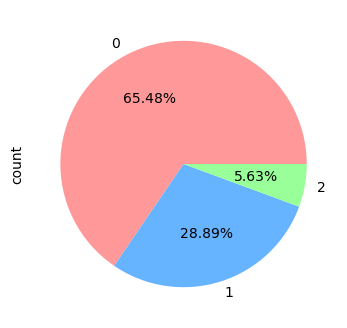

In [174]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors = colors)

In [175]:
df['luxury_score'].isnull().sum()

0

In [176]:
df['luxury_score'].describe()

count    3662.000000
mean       71.632714
std        53.119011
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Count'>

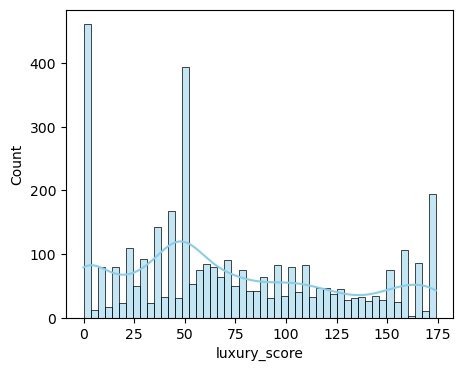

In [177]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

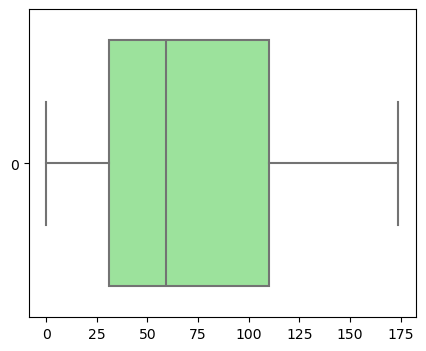

In [179]:
sns.boxplot(df['luxury_score'], color='lightgreen',orient = 'h')